In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Step 1: Upload multiple files
uploaded = files.upload()

# Step 2: Load the files into pandas DataFrames
# Assuming you have two files, for example, 'movies.csv' and 'tags.csv'

# Check if specific files are in the uploaded files
if 'movies.csv' in uploaded and 'tags.csv' in uploaded:
    movies_df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
    tags_df = pd.read_csv(io.BytesIO(uploaded['tags.csv']))

# You can now use movies_df and tags_df for further analysis
#print(movies_df.head())  # Display first few rows of the movies DataFrame
#print(tags_df.head())    # Display first few rows of the tags DataFrame


In [8]:
uploaded_tags=files.upload()

Saving movies.csv to movies.csv


In [9]:
uploaded_tags=files.upload()

Saving tags.csv to tags.csv


In [10]:
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [11]:
df = pd.read_csv('movies.csv')
df1 = pd.read_csv('tags.csv')
df2= pd.read_csv('ratings.csv')

In [12]:
terminator_movie_id = df[df['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

# Step 4: Filter ratings for the movie with the identified movieId
terminator_ratings = df2[df2['movieId'] == terminator_movie_id]

# Step 5: Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

# Step 6: Output the result
print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is: {average_rating:.2f}')

The average user rating for "Terminator 2: Judgment Day (1991)" is: 3.97


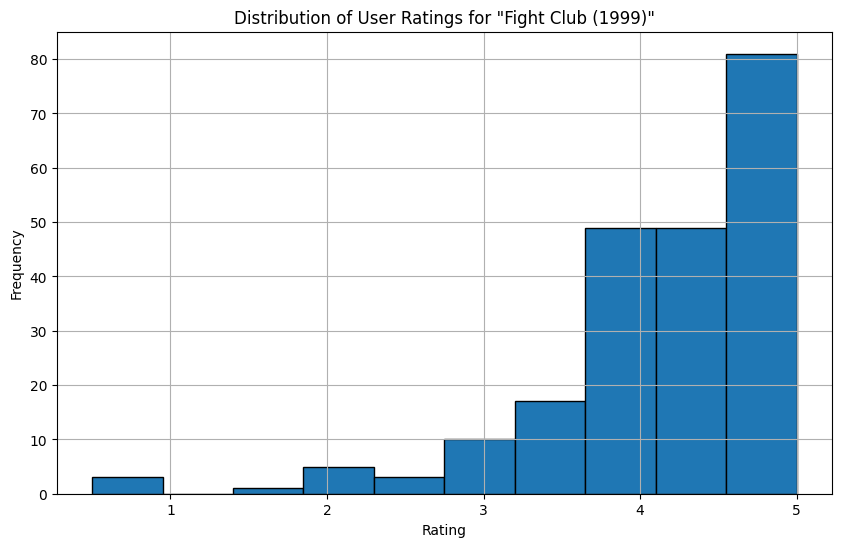

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
fight_club_movie_id = df[df['title'] == "Fight Club (1999)"]['movieId'].values[0]

# Step 4: Filter ratings for the movie with the identified movieId
fight_club_ratings = df2[df2['movieId'] == fight_club_movie_id]

# Step 5: Plot the distribution of user ratings
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [14]:
grouped_ratings_df = df2.groupby('movieId').agg(
    num_ratings=('rating', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()

# Step 4: Apply inner join on the movies dataframe and the grouped ratings dataframe
merged_df = pd.merge(df, grouped_ratings_df, on='movieId', how='inner')

# Step 5: Filter only those movies which have more than 50 user ratings
filtered_movies_df = merged_df[merged_df['num_ratings'] > 50]

# Display the result
print(filtered_movies_df.head())


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  num_ratings  avg_rating  
0  Adventure|Animation|Children|Comedy|Fantasy          215    3.920930  
1                   Adventure|Children|Fantasy          110    3.431818  
2                               Comedy|Romance           52    3.259615  
5                        Action|Crime|Thriller          102    3.946078  
6                               Comedy|Romance           54    3.185185  


In [15]:
most_popular_movie = filtered_movies_df.loc[filtered_movies_df['avg_rating'].idxmax()]

# Step 2: Display the result
print(f"The most popular movie based on average user ratings is:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['avg_rating']:.2f}")

The most popular movie based on average user ratings is:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43


In [16]:
# Assuming you have already executed the previous code to get filtered_movies_df

# Step 1: Sort the movies by the number of ratings in descending order
top_movies_by_ratings = filtered_movies_df.sort_values(by='num_ratings', ascending=False)

# Step 2: Select the top 5 movies
top_5_movies = top_movies_by_ratings.head(5)

# Step 3: Display the result
print("Top 5 movies based on the number of user ratings:")
print(top_5_movies[['title', 'num_ratings']])


Top 5 movies based on the number of user ratings:
                                 title  num_ratings
314                Forrest Gump (1994)          329
277   Shawshank Redemption, The (1994)          317
257                Pulp Fiction (1994)          307
510   Silence of the Lambs, The (1991)          279
1938                Matrix, The (1999)          278


In [17]:
df['genres'] = df['genres'].str.split('|')

# Filter for Sci-Fi genre
sci_fi_movies_df = df[df['genres'].apply(lambda x: 'Sci-Fi' in x)]

# Group the user ratings based on movieId and apply aggregation operations like count and mean
grouped_ratings_df = df2.groupby('movieId').agg(
    num_ratings=('rating', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()

# Join Sci-Fi movies with the grouped ratings
merged_sci_fi_df = pd.merge(sci_fi_movies_df, grouped_ratings_df, on='movieId', how='inner')

# Sort Sci-Fi movies by the number of ratings in descending order
sorted_sci_fi_df = merged_sci_fi_df.sort_values(by='num_ratings', ascending=False)

# Select the third most popular Sci-Fi movie
third_most_popular_sci_fi = sorted_sci_fi_df.iloc[2]  # 0-based index

# Display the result
print("The third most popular Sci-Fi movie based on the number of user ratings is:")
print(f"Title: {third_most_popular_sci_fi['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi['num_ratings']}")


The third most popular Sci-Fi movie based on the number of user ratings is:
Title: Jurassic Park (1993)
Number of Ratings: 238


In [18]:
uploaded_tags=files.upload()
links_df= pd.read_csv('links.csv')

Saving links.csv to links.csv


In [19]:
matrix_movie_id = df[df['title'] == "Matrix, The (1999)"]['movieId'].values[0]

# Step 5: Filter tags for the movie with the identified movieId
matrix_tags = df1[df1['movieId'] == matrix_movie_id]

# Step 6: Output the unique tags submitted by users for "Matrix, The (1999)"
unique_tags = matrix_tags['tag'].unique()
print(f'Unique tags for "Matrix, The (1999)": {unique_tags}')

Unique tags for "Matrix, The (1999)": ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [20]:
terminator_movie_id = df[df['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

# Step 4: Filter ratings for the movie with the identified movieId
terminator_ratings = df2[df2['movieId'] == terminator_movie_id]

# Step 5: Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

# Step 6: Output the result
print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is: {average_rating:.2f}')

The average user rating for "Terminator 2: Judgment Day (1991)" is: 3.97


In [23]:
movie_ratings_count = df['movieId'].value_counts()


In [24]:
most_rated_movie_id = movie_ratings_count.idxmax()
max_ratings = movie_ratings_count.max()

In [27]:
print(f'The movie with the ID {most_rated_movie_id} has received the maximum number of ratings: {max_ratings}')

The movie with the ID 356 has received the maximum number of ratings: 329


In [31]:
# Assuming 'imdbId' is the correct column name
imdb_column_name = 'imdbId'


In [33]:
imdb_ids = links_df[links_df['movieId'].isin(filtered_movies_df['movieId'])][imdb_column_name].tolist()

In [34]:
def scrape_imdb_reviews(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/reviews'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract reviews
    reviews = []
    review_blocks = soup.find_all('div', class_='text show-more__control')
    for block in review_blocks:
        reviews.append(block.get_text(strip=True))

    return reviews

In [38]:
!pip install requests
import requests
import pandas as pd
import requests  # Import requests to make HTTP requests
from bs4 import BeautifulSoup
from google.colab import files
import io
movie_reviews = {}
for imdb_id in imdb_ids:
    reviews = scrape_imdb_reviews(imdb_id)
    movie_reviews[imdb_id] = reviews

# Step 8: Display some reviews for verification
for imdb_id, reviews in movie_reviews.items():
    print(f'IMDb ID: {imdb_id}')
    print(f'Number of Reviews: {len(reviews)}')
    if reviews:
        print(f'Sample Review: {reviews[0]}')
    print('---')


IMDb ID: 114709
Number of Reviews: 0
---
IMDb ID: 113497
Number of Reviews: 0
---
IMDb ID: 113228
Number of Reviews: 0
---
IMDb ID: 113277
Number of Reviews: 0
---
IMDb ID: 114319
Number of Reviews: 0
---
IMDb ID: 113189
Number of Reviews: 0
---
IMDb ID: 112346
Number of Reviews: 0
---
IMDb ID: 112641
Number of Reviews: 0
---
IMDb ID: 114388
Number of Reviews: 0
---
IMDb ID: 112281
Number of Reviews: 0
---
IMDb ID: 113161
Number of Reviews: 0
---
IMDb ID: 113627
Number of Reviews: 0
---
IMDb ID: 114746
Number of Reviews: 0
---
IMDb ID: 112431
Number of Reviews: 0
---
IMDb ID: 112818
Number of Reviews: 0
---
IMDb ID: 112697
Number of Reviews: 0
---
IMDb ID: 114369
Number of Reviews: 0
---
IMDb ID: 114148
Number of Reviews: 0
---
IMDb ID: 114814
Number of Reviews: 0
---
IMDb ID: 113862
Number of Reviews: 0
---
IMDb ID: 116367
Number of Reviews: 0
---
IMDb ID: 115759
Number of Reviews: 0
---
IMDb ID: 116483
Number of Reviews: 0
---
IMDb ID: 112573
Number of Reviews: 0
---
IMDb ID: 75314
N

In [39]:
reviews_df = pd.DataFrame.from_dict(movie_reviews, orient='index').transpose()
reviews_df.to_csv('imdb_reviews.csv', index=False)

In [40]:
imdb_ids = links_df[links_df['movieId'].isin(filtered_movies_df['movieId'])][imdb_column_name].tolist()
movie_ids = links_df[links_df['movieId'].isin(filtered_movies_df['movieId'])]['movieId'].tolist()

# Step 6: Define a function to scrape IMDb ratings
def scrape_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the IMDb rating
    rating_tag = soup.find('span', itemprop='ratingValue')
    if rating_tag:
        return float(rating_tag.text)
    return None

# Step 7: Scrape ratings for each IMDb ID and store them along with movieId
movie_ratings = {}
for imdb_id, movie_id in zip(imdb_ids, movie_ids):
    rating = scrape_imdb_rating(imdb_id)
    if rating is not None:
        movie_ratings[movie_id] = rating

# Step 8: Find the movieId with the highest IMDb rating
highest_rated_movie = max(movie_ratings, key=movie_ratings.get)
highest_rating = movie_ratings[highest_rated_movie]

print(f'The movieId with the highest IMDb rating is: {highest_rated_movie}')
print(f'The highest IMDb rating is: {highest_rating}')


ValueError: max() arg is an empty sequence

In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from google.colab import files
import io

# Step 1: Upload the required files
uploaded = files.upload()

# Step 2: Load the links CSV file into pandas DataFrame
links_df = pd.read_csv('links.csv')

# Step 3: Check the columns in links.csv to ensure correct column names
print("Columns in links.csv:", links_df.columns)

# Step 4: Use the correct column name
imdb_column_name = 'imdbId'  # Ensure this is correct by checking the printed columns

# Step 5: Filter IMDb IDs for movies with more than 50 ratings (Assuming filtered_movies_df is already available)
imdb_ids = links_df[links_df['movieId'].isin(filtered_movies_df['movieId'])][imdb_column_name].tolist()
movie_ids = links_df[links_df['movieId'].isin(filtered_movies_df['movieId'])]['movieId'].tolist()

# Step 6: Define a function to scrape IMDb ratings
def scrape_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the IMDb rating
    rating_tag = soup.find('span', itemprop='ratingValue')
    if rating_tag:
        print(f'Found rating for IMDb ID {imdb_id}: {rating_tag.text}')  # Debugging print
        return float(rating_tag.text)
    else:
        print(f'No rating found for IMDb ID {imdb_id}')  # Debugging print
    return None

# Step 7: Scrape ratings for each IMDb ID and store them along with movieId
movie_ratings = {}
for imdb_id, movie_id in zip(imdb_ids, movie_ids):
    rating = scrape_imdb_rating(imdb_id)
    if rating is not None:
        movie_ratings[movie_id] = rating

# Step 8: Check if movie_ratings is populated
if not movie_ratings:
    print("No ratings were scraped. Please check the scraping process.")
else:
    # Step 9: Find the movieId with the highest IMDb rating
    highest_rated_movie = max(movie_ratings, key=movie_ratings.get)
    highest_rating = movie_ratings[highest_rated_movie]

    print(f'The movieId with the highest IMDb rating is: {highest_rated_movie}')
    print(f'The highest IMDb rating is: {highest_rating}')


Saving links.csv to links (2).csv
Columns in links.csv: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
No rating found for IMDb ID 114709
No rating found for IMDb ID 113497
No rating found for IMDb ID 113228
No rating found for IMDb ID 113277
No rating found for IMDb ID 114319
No rating found for IMDb ID 113189
No rating found for IMDb ID 112346
No rating found for IMDb ID 112641
No rating found for IMDb ID 114388
No rating found for IMDb ID 112281
No rating found for IMDb ID 113161
No rating found for IMDb ID 113627
No rating found for IMDb ID 114746
No rating found for IMDb ID 112431
No rating found for IMDb ID 112818
No rating found for IMDb ID 112697
No rating found for IMDb ID 114369
No rating found for IMDb ID 114148
No rating found for IMDb ID 114814
No rating found for IMDb ID 113862
No rating found for IMDb ID 116367
No rating found for IMDb ID 115759
No rating found for IMDb ID 116483
No rating found for IMDb ID 112573
No rating found for IMDb ID 75314
No rating found

In [46]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from google.colab import files
import io

In [47]:
uploaded = files.upload()

Saving links.csv to links (3).csv


In [50]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load the filtered links DataFrame
filtered_links_df = pd.read_csv('links.csv')

def get_imdb_reviews(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/reviews'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    reviews = []
    for review in soup.find_all('div', class_='text show-more__control'):
        reviews.append(review.get_text())

    return reviews

# Iterate over each movie and scrape IMDb reviews
all_reviews = {}

for index, row in filtered_links_df.iterrows():
    imdb_id = str(row['imdbId']).zfill(7)  # Ensuring IMDb ID is in the correct format
    reviews = get_imdb_reviews(imdb_id)
    all_reviews[imdb_id] = reviews

# Optionally, save the reviews to a file
import json
with open('imdb_reviews.json', 'w') as f:
    json.dump(all_reviews, f)

print("Scraping completed and reviews saved to 'imdb_reviews.json'.")


Scraping completed and reviews saved to 'imdb_reviews.json'.


In [51]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load the filtered links DataFrame (assuming you have already filtered the movies with > 50 ratings)
filtered_links_df = pd.read_csv('links.csv')

def get_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the IMDb rating from the page
    rating_tag = soup.find('span', itemprop='ratingValue')
    if rating_tag:
        return float(rating_tag.text)
    return None

# Initialize a dictionary to store IMDb ratings
imdb_ratings = {}

# Iterate over each movie and scrape IMDb rating
for index, row in filtered_links_df.iterrows():
    imdb_id = str(row['imdbId']).zfill(7)  # Ensure IMDb ID is in the correct format
    rating = get_imdb_rating(imdb_id)
    if rating is not None:
        imdb_ratings[row['movieId']] = rating

# Find the movie with the highest IMDb rating
if imdb_ratings:
    highest_rated_movie_id = max(imdb_ratings, key=imdb_ratings.get)
    highest_rating = imdb_ratings[highest_rated_movie_id]

    print(f"The movie with the highest IMDb rating has movieId: {highest_rated_movie_id}")
    print(f"Highest IMDb rating: {highest_rating}")
else:
    print("No ratings were found.")

# Optionally, save the IMDb ratings to a file
import json
with open('imdb_ratings.json', 'w') as f:
    json.dump(imdb_ratings, f)

print("IMDb ratings saved to 'imdb_ratings.json'.")


No ratings were found.
IMDb ratings saved to 'imdb_ratings.json'.


In [53]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"

    print(f"Scraping URL: {URL}")  # Debugging output

    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    response = requests.get(URL, headers=request_header)

    if response.status_code != 200:
        print(f"Failed to retrieve {URL}, status code: {response.status_code}")
        return np.nan

    soup = BeautifulSoup(response.text, 'html.parser')

    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})

    if imdb_rating:
        return imdb_rating.text
    else:
        print(f"Could not find rating for {URL}")
        return np.nan


In [54]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load the filtered links DataFrame (assuming you have already filtered the movies with > 50 ratings)
filtered_links_df = pd.read_csv('links.csv')

def get_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the IMDb rating from the page
    rating_tag = soup.find('span', itemprop='ratingValue')
    if rating_tag:
        return float(rating_tag.text)
    return None

# Initialize a dictionary to store IMDb ratings
imdb_ratings = {}

# Iterate over each movie and scrape IMDb rating
for index, row in filtered_links_df.iterrows():
    imdb_id = str(row['imdbId']).zfill(7)  # Ensure IMDb ID is in the correct format
    rating = get_imdb_rating(imdb_id)
    if rating is not None:
        imdb_ratings[row['movieId']] = rating

# Find the movie with the highest IMDb rating
if imdb_ratings:
    highest_rated_movie_id = max(imdb_ratings, key=imdb_ratings.get)
    highest_rating = imdb_ratings[highest_rated_movie_id]

    print(f"The movie with the highest IMDb rating has movieId: {highest_rated_movie_id}")
    print(f"Highest IMDb rating: {highest_rating}")
else:
    print("No ratings were found.")

# Optionally, save the IMDb ratings to a file
import json
with open('imdb_ratings.json', 'w') as f:
    json.dump(imdb_ratings, f)

print("IMDb ratings saved to 'imdb_ratings.json'.")


No ratings were found.
IMDb ratings saved to 'imdb_ratings.json'.
